In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Description about Batsman table:
POS : Position

PLAYER : Name of the Player
    
Mat : Number of Matches Played
    
Inns : Inns played
    
NO : NOT OUT in number of Matches played
    
Runs : Number of Runs Scored 
    
HS : Highest Score ever made by the batsman.
    
Avg : Average runs scored throught out the ipl 2020 (670 / 14)

BF : Ball Faced (Total number of balls received, including no-balls but not including wides)
    
SR : Stike Rate ( Avg number of runs scored per 100 ball faced) High stike rate, more effective batsman
    
100 : Number of 100 scored in each match
    
50 : Number of 50 scored in each match
    
4s : Number of 4s in each match
    
6s : Number of 6s in each match

In [2]:
# Loading batsman Dataset:

In [119]:
d = pd.read_excel('batsman-stats.xlsx')
d.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1.0,NaN,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,NaN,KLRahul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
3,NaN,Shikhar Dhawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0


In [4]:
# Finding null value

In [120]:
d.isnull().sum() / len(d)

POS       0.5
PLAYER    0.5
Mat       0.5
Inns      0.5
NO        0.5
Runs      0.5
HS        0.5
Avg       0.5
BF        0.5
SR        0.5
100       0.5
50        0.5
4s        0.5
6s        0.5
dtype: float64

In [6]:
# null vlaue imputation:

In [121]:
d1 = pd.DataFrame(d['PLAYER'])
d1 = d1.dropna()
d1 = d1.reset_index(drop = True)
d1

,PLAYER
0,KLRahul
1,Shikhar Dhawan
2,David Warner
3,Shreyas Iyer
4,Ishan Kishan
...,...
95,Moeen Ali
96,Sandeep Sharma
97,Mohammad Nabi
98,Rinku Singh


In [122]:
d2 = pd.DataFrame(d.drop('PLAYER',axis = 1))
d2 = d2.dropna()
d2 = d2.reset_index(drop = True)
d2

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1.0,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,2.0,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,3.0,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,4.0,17.0,17.0,2.0,519.0,88*,34.6,421.0,123.27,0.0,3.0,40.0,16.0
4,5.0,14.0,13.0,4.0,516.0,99,57.33,354.0,145.76,0.0,4.0,36.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,3.0,3.0,0.0,12.0,11,4,16.0,75.00,0.0,0.0,1.0,0.0
96,97.0,13.0,5.0,3.0,12.0,9,6,15.0,80.00,0.0,0.0,1.0,0.0
97,98.0,1.0,1.0,1.0,11.0,11*,-,8.0,137.50,0.0,0.0,2.0,0.0
98,99.0,1.0,1.0,0.0,11.0,11,11,11.0,100.00,0.0,0.0,1.0,0.0


In [9]:
# Merging Dataset

In [123]:
dd = pd.merge(d1,d2,left_index= True,right_index=True)
dd.head()

,PLAYER,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,David Warner,3.0,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88*,34.6,421.0,123.27,0.0,3.0,40.0,16.0
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,57.33,354.0,145.76,0.0,4.0,36.0,30.0


In [11]:
# checking null value after removing null values

In [124]:
dd.isnull().sum()

PLAYER    0
POS       0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [13]:
# Finding datatypes

In [125]:
dd.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
NO        float64
Runs      float64
HS         object
Avg        object
BF        float64
SR        float64
100       float64
50        float64
4s        float64
6s        float64
dtype: object

In [127]:
dd['a'] = dd['HS'].str.slice(-1).replace({'*':'NOT_OUT',np.NaN:'OUT'})
dd['a']

0     NOT_OUT
1     NOT_OUT
2     NOT_OUT
3     NOT_OUT
4         OUT
       ...   
95        OUT
96        OUT
97    NOT_OUT
98        OUT
99        OUT
Name: a, Length: 100, dtype: object

In [128]:
dd.insert(loc = 7,column = 'HS_3',value = dd['a'].to_list())

In [129]:
dd.drop('a',axis = 1,inplace = True)

In [130]:
dd['Avg'].unique()

array([55.83, 44.14, 39.14, 34.6, 57.33, 35.92, 40, 31.53, 42.36, 45.4,
       40.81, 33.84, 32.69, 38.54, 41.8, 28.84, 39.88, 35.3, 25.14, 31.36,
       31.18, 27.66, 32.8, 45.28, 25.91, 29.9, 41.14, 40.71, 35.12, 22.33,
       53.6, 42.5, 46.4, 23, 17.53, 71.33, 51, 25, 16.33, 23.25, 23.12,
       14.08, 20.85, 14.77, 21.66, 18.42, 13.44, 13, 14.62, 18.83, 14.12,
       18.5, 22.2, 18.16, 15.42, 20.6, 101, 24.25, 12.28, 83, 19.5, '-',
       14.2, 33, 20.66, 19.66, 14, 42, 13.33, 9.25, 12.33, 8.75, 8.5,
       16.5, 10.66, 16, 9.66, 27, 7.33, 21, 10.5, 9.5, 9, 17, 8, 7.5, 5,
       15, 12, 4, 6, 11], dtype=object)

In [131]:
dd['Avg1'] = dd['Avg'].replace({'-':np.nan})

In [132]:
dd['Avg1'] = dd['Avg1'].fillna(dd['Runs']/dd['Mat']).astype(float)

In [133]:
dd['Avg1'].unique()

array([ 55.83      ,  44.14      ,  39.14      ,  34.6       ,
        57.33      ,  35.92      ,  40.        ,  31.53      ,
        42.36      ,  45.4       ,  40.81      ,  33.84      ,
        32.69      ,  38.54      ,  41.8       ,  28.84      ,
        39.88      ,  35.3       ,  25.14      ,  31.36      ,
        31.18      ,  27.66      ,  32.8       ,  45.28      ,
        25.91      ,  29.9       ,  41.14      ,  40.71      ,
        35.12      ,  22.33      ,  53.6       ,  42.5       ,
        46.4       ,  23.        ,  17.53      ,  71.33      ,
        51.        ,  25.        ,  16.33      ,  23.25      ,
        23.12      ,  14.08      ,  20.85      ,  14.77      ,
        21.66      ,  18.42      ,  13.44      ,  13.        ,
        14.62      ,  18.83      ,  14.12      ,  18.5       ,
        22.2       ,  18.16      ,  15.42      ,  20.6       ,
       101.        ,  24.25      ,  12.28      ,  83.        ,
        19.5       ,   8.875     ,  14.2       ,  33.  

In [134]:
dd.drop('Avg',axis=1,inplace = True)

In [182]:
for i in dd['HS'].index:
    for j in str(dd.loc[i,'HS']):
        if '*' in j:
            dd.loc[i,'HS'] = dd.loc[i,'HS'].replace('*','')
        else:
            dd.loc[i,'HS'] = dd.loc[i,'HS']

In [183]:
dd.head()

,PLAYER,POS,Mat,Inns,NO,Runs,HS,HS_3,BF,SR,100,50,4s,6s,Avg1
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132,NOT_OUT,518.0,129.34,1.0,5.0,58.0,23.0,55.83
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106,NOT_OUT,427.0,144.73,2.0,4.0,67.0,12.0,44.14
2,David Warner,3.0,16.0,16.0,2.0,548.0,85,NOT_OUT,407.0,134.64,0.0,4.0,52.0,14.0,39.14
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88,NOT_OUT,421.0,123.27,0.0,3.0,40.0,16.0,34.60
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,OUT,354.0,145.76,0.0,4.0,36.0,30.0,57.33


Q1 : Top 5 batsman who scored maximum runs in less inns?

In [184]:
# Top 5 Batsman with maximum runs with less inns
dd.sort_values(by = ['Runs','Inns'],ascending = [False,True]).head()

,PLAYER,POS,Mat,Inns,NO,Runs,HS,HS_3,BF,SR,100,50,4s,6s,Avg1
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132,NOT_OUT,518.0,129.34,1.0,5.0,58.0,23.0,55.83
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106,NOT_OUT,427.0,144.73,2.0,4.0,67.0,12.0,44.14
2,David Warner,3.0,16.0,16.0,2.0,548.0,85,NOT_OUT,407.0,134.64,0.0,4.0,52.0,14.0,39.14
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88,NOT_OUT,421.0,123.27,0.0,3.0,40.0,16.0,34.60
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,OUT,354.0,145.76,0.0,4.0,36.0,30.0,57.33


Q2 : Name the player who scored highest run and Not out in the IPL 2020

In [166]:
# Player not-out and scored highest run
a = dd['Runs'].max()
dd[(dd['Runs'] == a)&(dd['HS_3'] == 'NOT_OUT')]['PLAYER']

0    KLRahul
Name: PLAYER, dtype: object

Q3 : Name the player with Runs,SR,Average who scored more number of 4s and 6s in IPL 2020.

In [161]:
# Player who scored highest number of 4's
a = dd['4s'].max()
dd[dd['4s']==a][['PLAYER','Runs','SR','Avg1']]

,PLAYER,Runs,SR,Avg1
1,Shikhar Dhawan,618.0,144.73,44.14


In [171]:
# Player who scored highest number of 6's
a = dd['6s'].max()
dd[dd['6s']==a][['PLAYER','Runs','SR','Avg1']]

,PLAYER,Runs,SR,Avg1
4,Ishan Kishan,516.0,145.76,57.33


Q4 : Name the top 5 player with highest Stike Rate and their Average.

In [155]:
# Player with highest SR and there avg
dd.sort_values('SR',ascending = False)[['Avg1','PLAYER']].head(5)

,Avg1,PLAYER
31,53.60,Kieron Pollard
50,18.83,Jofra Archer
29,35.12,Hardik Pandya
83,21.00,Tushar Deshpande
33,46.40,Ravindra Jadeja


Q5 : List the Player name with other details who is having the Highest Score in IPL 2020.

In [188]:
# Converting object type into int, to find the highest value
dd['HS'] = dd['HS'].astype(int)

In [189]:
# Player with Highest score 
a = dd['HS'].max()
dd[dd['HS'] == a]

,PLAYER,POS,Mat,Inns,NO,Runs,HS,HS_3,BF,SR,100,50,4s,6s,Avg1
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132,NOT_OUT,518.0,129.34,1.0,5.0,58.0,23.0,55.83


Q6 : Name the player who is Not out for more number of mathces in IPL 2020.

In [151]:
# Player not-out for more number of matches
dd[dd['HS_3']=='NOT_OUT'].sort_values('Mat',ascending = False)['PLAYER'].head(1)

3    Shreyas Iyer
Name: PLAYER, dtype: object

Q7 : Name the player who scored more runs in IPL 2020.

In [139]:
# Player with highest run
a = dd['Runs'].max()
dd[dd['Runs'] == a]['PLAYER']

0    KLRahul
Name: PLAYER, dtype: object

Q8 : Name the Player and his Run scored who scored more number of 100's in IPL 2020.

In [138]:
# Player and run who scored highest number of 100's
a = dd[100].max()
dd[dd[100] == a][['PLAYER','Runs']]

,PLAYER,Runs
1,Shikhar Dhawan,618.0


Q9 : Plot the distribution of Stike Rate for all players.

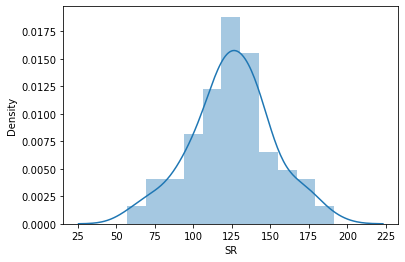

In [112]:
# plot to analyse the distribution of SR
sns.distplot(dd['SR'])
plt.show()

In [ ]:
# Inference: From the above distribution plot we can conclude that, Stike Rate Data is normally ditributed. 

Q10 : Generate pair plots for the following variables:
Inns, Runs, BF, SR, AVG1

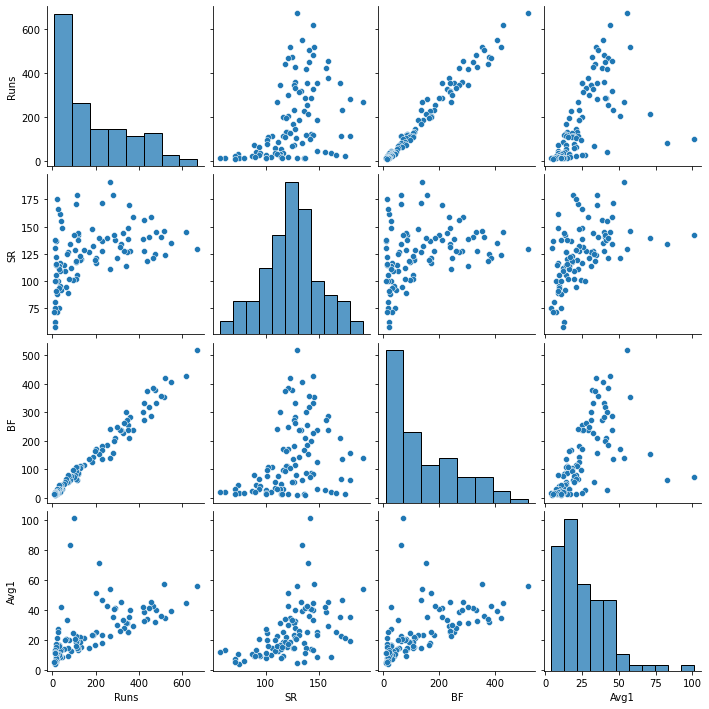

In [111]:
# pairplot for listed numerical features
.pairplot(dd[['Runs','SR','BF','Avg1']])
plt.show()

In [ ]:
# Inference: From the above pairplot, we can conclude that, among the listed input feature, Ball Faced have high positively 
# correlation with Runs.

Q11 : Is there correlation between Strike Rate and Runs?

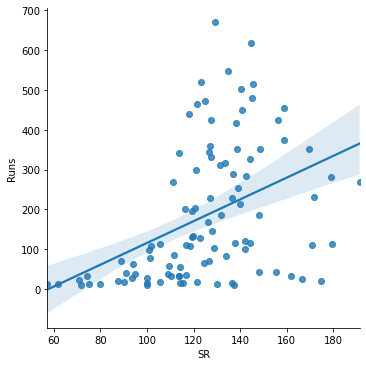

In [106]:
# plot to identify correlation between SR and Runs
sns.lmplot(x = 'SR', y = 'Runs',data = dd)
plt.show()

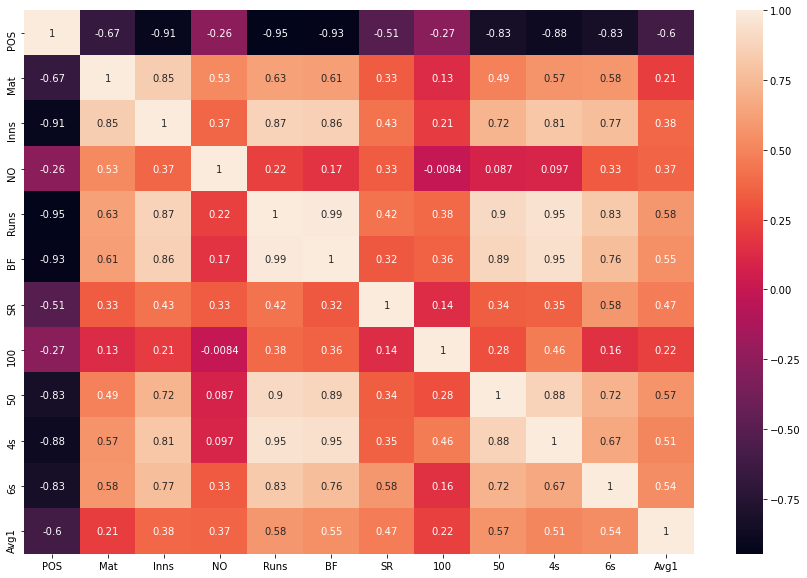

In [109]:
plt.figure(figsize = (15,10))
sns.heatmap(dd.corr(),annot = True)
plt.show()

In [ ]:
# Inference : From the above lmplot and heatmap, we can conclude that Stike Rate and Runs are slight positively correlated.

# Description about Bowler Dataset

PLAYER : Name of the Player

Mat: no.of matches
    
Inns : no.of matches

Runs: Runs given in overall IPL

Ov : Overs bowled

Wkts : Total number of wickets

BBI : Best Bowling Inning (maximum wickets with lowest run)
  
Avg : Number of runs they have conceded per wicket taken. Lower the bowling average, better bowler performing

Econ : Avg number of runs they have conceded per over bowled. Lower economy rate, better bowler performing.

SR : Avg number of balls bowled per wicket taken. Lower strike rate, effective bowler taking wickets quickly

4W : 4 wickets in each match

5W : 5 wicktes in each match

In [24]:
# Loading Bowler Dataset:

In [25]:
d1 = pd.read_excel('bowler-stats.xlsx')
d1.head()

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1.0,NaN,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,NaN,Kagiso Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
3,NaN,Jasprit Bumrah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0


In [26]:
# Computing null values:

In [27]:
d1.isnull().sum()

POS       98
PLAYER    98
Mat       98
Inns      98
Ov        98
Runs      98
Wkts      98
BBI       98
Avg       98
Econ      98
SR        98
4w        98
5w        98
dtype: int64

In [28]:
# null value imputation:

In [29]:
d11 = pd.DataFrame(d1['PLAYER'])
d11 = d11.dropna()
d11 = d11.reset_index(drop = True)
d11

,PLAYER
0,Kagiso Rabada
1,Jasprit Bumrah
2,Trent Boult
3,Anrich Nortje
4,Yuzvendra Chahal
...,...
93,Varun Aaron
94,Umesh Yadav
95,Kane Williamson
96,David Warner


In [30]:
d12 = pd.DataFrame(d1.drop('PLAYER',axis = 1))
d12 = d12.dropna()
d12 = d12.reset_index(drop = True)
d12

,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1.0,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,2.0,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
2,3.0,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
3,4.0,16.0,16.0,61.0,512.0,22.0,3/33,23.27,8.39,16.63,0.0,0.0
4,5.0,15.0,15.0,57.1,405.0,21.0,3/18,19.28,7.08,16.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,94.0,3.0,3.0,8.0,94.0,0.0,0/22,-,11.75,-,0.0,0.0
94,95.0,2.0,2.0,7.0,83.0,0.0,0/35,-,11.85,-,0.0,0.0
95,96.0,12.0,1.0,2.0,24.0,0.0,0/24,-,12.00,-,0.0,0.0
96,97.0,16.0,1.0,0.1,2.0,0.0,0/2,-,12.00,-,0.0,0.0


In [31]:
# Merging two dataframe:
f_d1 = pd.merge(d11,d12,left_index = True, right_index = True)
f_d1.head()

,PLAYER,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,Kagiso Rabada,1.0,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,Jasprit Bumrah,2.0,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
2,Trent Boult,3.0,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
3,Anrich Nortje,4.0,16.0,16.0,61.0,512.0,22.0,3/33,23.27,8.39,16.63,0.0,0.0
4,Yuzvendra Chahal,5.0,15.0,15.0,57.1,405.0,21.0,3/18,19.28,7.08,16.33,0.0,0.0


In [32]:
# To check with value counts:
for i in f_d1.columns:
    print(f_d1[i].value_counts(normalize = True))

Jayant Yadav        0.010204
Chris Green         0.010204
Adam Zampa          0.010204
Tushar Deshpande    0.010204
Kagiso Rabada       0.010204
                      ...   
Piyush Chawla       0.010204
Ravindra Jadeja     0.010204
Daniel Sams         0.010204
Dale Steyn          0.010204
Trent Boult         0.010204
Name: PLAYER, Length: 98, dtype: float64
98.0    0.010204
25.0    0.010204
27.0    0.010204
28.0    0.010204
29.0    0.010204
          ...   
68.0    0.010204
69.0    0.010204
70.0    0.010204
71.0    0.010204
1.0     0.010204
Name: POS, Length: 98, dtype: float64
1.0     0.132653
14.0    0.102041
3.0     0.091837
7.0     0.091837
15.0    0.071429
5.0     0.071429
2.0     0.061224
16.0    0.061224
10.0    0.061224
9.0     0.051020
8.0     0.040816
6.0     0.040816
13.0    0.040816
12.0    0.030612
4.0     0.020408
17.0    0.020408
11.0    0.010204
Name: Mat, dtype: float64
1.0     0.173469
3.0     0.102041
2.0     0.081633
5.0     0.081633
7.0     0.081633
14.0    0.07142

In [33]:
f_d1.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
Ov        float64
Runs      float64
Wkts      float64
BBI        object
Avg        object
Econ      float64
SR         object
4w        float64
5w        float64
dtype: object

In [34]:
f_d1['5w'].unique()

array([0., 1.])

In [35]:
f_d1['4w'].unique()

array([2., 1., 0.])

In [36]:
f_d1['SR'].unique() # '-' impute

array([13.13, 13.33, 13.76, 16.63, 16.33, 19.2, 16.7, 16.1, 18.35, 23.56,
       21.2, 22.28, 12, 23.53, 19.38, 13.69, 25.5, 26, 17.27, 14.81,
       19.36, 27.6, 18.9, 19.4, 30, 34, 17.33, 16.55, 25.44, 21, 10.66,
       37.5, 19.25, 21.75, 19.83, 50.16, 45.66, 36.33, 20, 18, 31.2, 45.6,
       26.4, 22.8, 19.75, 13.5, 31.5, 26.25, 34.5, 28.33, 42, 33, 45, 51,
       60, 66, 72, 48, 24, 70, '-'], dtype=object)

In [37]:
f_d1['SR'] = f_d1['SR'].replace({'-':np.nan})

In [38]:
f_d1['SR'].unique()

array([13.13, 13.33, 13.76, 16.63, 16.33, 19.2 , 16.7 , 16.1 , 18.35,
       23.56, 21.2 , 22.28, 12.  , 23.53, 19.38, 13.69, 25.5 , 26.  ,
       17.27, 14.81, 19.36, 27.6 , 18.9 , 19.4 , 30.  , 34.  , 17.33,
       16.55, 25.44, 21.  , 10.66, 37.5 , 19.25, 21.75, 19.83, 50.16,
       45.66, 36.33, 20.  , 18.  , 31.2 , 45.6 , 26.4 , 22.8 , 19.75,
       13.5 , 31.5 , 26.25, 34.5 , 28.33, 42.  , 33.  , 45.  , 51.  ,
       60.  , 66.  , 72.  , 48.  , 24.  , 70.  ,   nan])

In [39]:
# For 20 person wikcet is zero. if we are imputing null values it will be infinity. 

# so just replace it with zero.
f_d1['SR'] = f_d1['SR'].replace({np.nan : 0})
f_d1['SR']

0     13.13
1     13.33
2     13.76
3     16.63
4     16.33
      ...  
93     0.00
94     0.00
95     0.00
96     0.00
97     0.00
Name: SR, Length: 98, dtype: float64

In [40]:
f_d1['Econ'].unique()

array([ 8.34,  6.73,  7.97,  8.39,  7.08,  5.37,  6.55,  8.57,  6.84,
        8.02,  8.16,  7.19,  8.32,  7.66,  8.19,  9.53,  7.37,  7.61,
        7.86,  6.63,  8.68,  9.01,  7.46,  8.5 ,  8.54,  6.41,  8.15,
        8.77,  9.61,  9.65, 10.43,  5.96,  9.42,  9.72,  7.57,  8.29,
        8.75,  8.8 ,  9.09,  7.92,  7.94,  8.09,  8.88,  6.22,  8.11,
        9.04,  9.37,  9.91,  6.98,  7.2 ,  8.04,  8.93, 11.29, 11.44,
        7.33,  8.36,  9.1 ,  9.86, 10.26, 11.7 , 16.  ,  6.14,  6.4 ,
        6.9 ,  8.4 , 10.5 , 11.25, 11.4 , 11.5 , 12.5 , 13.71,  5.75,
        6.  ,  8.47,  8.66,  9.  ,  9.5 , 10.  , 10.25, 10.37, 11.33,
       11.75, 11.85, 12.  , 13.5 ])

In [41]:
f_d1['Avg'].unique()  # '-' impute

array([18.26, 14.96, 18.28, 23.27, 19.28, 17.2, 18.25, 23, 20.94, 31.5,
       28.86, 26.71, 16.64, 30.07, 26.46, 21.76, 31.33, 33, 34.08, 19.09,
       21.45, 29.09, 32.6, 23.5, 27.5, 42.7, 36.33, 23.55, 24.22, 40.77,
       33.77, 18.55, 37.25, 30.25, 35.25, 24.66, 63.33, 63.16, 30, 53,
       29.33, 31.83, 29.16, 41.2, 60.4, 35.6, 46.2, 20.5, 47.5, 41, 57,
       24, 56.33, 44.66, 64, 69.33, 22, 26.5, 46, 45.5, 74, 77, 99.5, 32,
       43, 76, 92, 42, 84, 45, 133, 50, 96, '-'], dtype=object)

In [42]:
f_d1['Avg'] = f_d1['Avg'].replace({'-': np.nan})
f_d1['Avg'].unique()

array([ 18.26,  14.96,  18.28,  23.27,  19.28,  17.2 ,  18.25,  23.  ,
        20.94,  31.5 ,  28.86,  26.71,  16.64,  30.07,  26.46,  21.76,
        31.33,  33.  ,  34.08,  19.09,  21.45,  29.09,  32.6 ,  23.5 ,
        27.5 ,  42.7 ,  36.33,  23.55,  24.22,  40.77,  33.77,  18.55,
        37.25,  30.25,  35.25,  24.66,  63.33,  63.16,  30.  ,  53.  ,
        29.33,  31.83,  29.16,  41.2 ,  60.4 ,  35.6 ,  46.2 ,  20.5 ,
        47.5 ,  41.  ,  57.  ,  24.  ,  56.33,  44.66,  64.  ,  69.33,
        22.  ,  26.5 ,  46.  ,  45.5 ,  74.  ,  77.  ,  99.5 ,  32.  ,
        43.  ,  76.  ,  92.  ,  42.  ,  84.  ,  45.  , 133.  ,  50.  ,
        96.  ,    nan])

In [43]:
# to fillna in avg column:
f_d1['Avg'] = f_d1['Avg'].fillna(f_d1['Runs']/f_d1['Wkts']).astype(float)
f_d1['Avg'].unique()

array([ 18.26,  14.96,  18.28,  23.27,  19.28,  17.2 ,  18.25,  23.  ,
        20.94,  31.5 ,  28.86,  26.71,  16.64,  30.07,  26.46,  21.76,
        31.33,  33.  ,  34.08,  19.09,  21.45,  29.09,  32.6 ,  23.5 ,
        27.5 ,  42.7 ,  36.33,  23.55,  24.22,  40.77,  33.77,  18.55,
        37.25,  30.25,  35.25,  24.66,  63.33,  63.16,  30.  ,  53.  ,
        29.33,  31.83,  29.16,  41.2 ,  60.4 ,  35.6 ,  46.2 ,  20.5 ,
        47.5 ,  41.  ,  57.  ,  24.  ,  56.33,  44.66,  64.  ,  69.33,
        22.  ,  26.5 ,  46.  ,  45.5 ,  74.  ,  77.  ,  99.5 ,  32.  ,
        43.  ,  76.  ,  92.  ,  42.  ,  84.  ,  45.  , 133.  ,  50.  ,
        96.  ,    inf])

In [44]:
f_d1['Avg'] = f_d1['Avg'].replace({np.inf:0})
f_d1['Avg'].unique()

# For 20 person wikcet is zero. if we are imputing null values it will be infinity. 

# so just replace it with zero.

array([ 18.26,  14.96,  18.28,  23.27,  19.28,  17.2 ,  18.25,  23.  ,
        20.94,  31.5 ,  28.86,  26.71,  16.64,  30.07,  26.46,  21.76,
        31.33,  33.  ,  34.08,  19.09,  21.45,  29.09,  32.6 ,  23.5 ,
        27.5 ,  42.7 ,  36.33,  23.55,  24.22,  40.77,  33.77,  18.55,
        37.25,  30.25,  35.25,  24.66,  63.33,  63.16,  30.  ,  53.  ,
        29.33,  31.83,  29.16,  41.2 ,  60.4 ,  35.6 ,  46.2 ,  20.5 ,
        47.5 ,  41.  ,  57.  ,  24.  ,  56.33,  44.66,  64.  ,  69.33,
        22.  ,  26.5 ,  46.  ,  45.5 ,  74.  ,  77.  ,  99.5 ,  32.  ,
        43.  ,  76.  ,  92.  ,  42.  ,  84.  ,  45.  , 133.  ,  50.  ,
        96.  ,   0.  ])

In [45]:
f_d1['BBI'].unique()

array(['4/24', '4/14', '4/18 ', '3/33 ', '3/18', '3/7', '3/19', '3/15',
       '5/20', '2/24 ', '2/18', '3/34', '3/25 ', '3/29 ', '3/19 ', '3/26',
       '2/18 ', '4/34', '4/26', '3/8', '2/19 ', '3/25', '3/21 ', '2/28',
       '2/28 ', '2/15', '3/23', '2/36', '3/17 ', '3/38', '2/16', '2/24',
       '2/41', '2/26', '2/25', '3/37', '2/42', '2/17 ', '2/33', '2/29 ',
       '2/19', '2/13 ', '1/11 ', '1/5', '3/29', '2/32', '2/35', '1/10',
       '2/34', '2/37 ', '1/37', '1/23', '1/12', '1/15 ', '1/17', '2/32 ',
       '1/39', '2/64 ', '1/25 ', '1/19', '1/24', '1/20 ', '1/21', '1/45',
       '1/45 ', '1/33', '1/46', '1/50', '1/41 ', '0/23', '0/5', '0/22',
       '0/24', '0/26', '0/6', '0/9', '0/14', '0/30', '0/20', '0/41',
       '0/39', '0/42', '0/34', '0/7', '0/35', '0/2', '0/13'], dtype=object)

In [46]:
val = f_d1['BBI'].str.split('/')

lst = []
for i in val:
    lst.append(int(i[0])/int(i[1]))
    
f_d1['BBI'] = lst
f_d1['BBI']

0     0.166667
1     0.285714
2     0.222222
3     0.090909
4     0.166667
        ...   
93    0.000000
94    0.000000
95    0.000000
96    0.000000
97    0.000000
Name: BBI, Length: 98, dtype: float64

In [47]:
f_d1['Wkts'].unique()

array([30., 27., 25., 22., 21., 20., 17., 16., 15., 14., 13., 12., 11.,
       10.,  9.,  8.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

In [48]:
f_d1['Runs'] = f_d1['Runs'].astype(int)

In [49]:
f_d1['Ov'].unique()

array([65.4, 60. , 57.2, 61. , 57.1, 64. , 55.4, 53.4, 52. , 62.5, 53. ,
       28. , 51. , 42. , 29.4, 31.4, 27.1, 35.3, 46. , 31.3, 32.2, 50. ,
       26. , 24.5, 38.1, 16. , 25.4, 29. , 19.5, 50.1, 45.4, 21. , 36.2,
       20. , 18. , 38. , 22. , 19. , 13.1,  9. , 17.3, 23. , 14.1, 10. ,
       15. , 17. , 18.1,  6. ,  7. , 11. ,  4. , 12. ,  5. ,  8. , 11.4,
        0.5,  3. ,  2.5,  0.4,  1. ,  2. ,  0.1])

In [50]:
f_d1['Inns'].unique()

array([17., 15., 16., 14., 13.,  7.,  9., 10.,  8.,  4.,  5.,  6., 11.,
        3.,  2.,  1.])

In [51]:
f_d1['Mat'].unique()

array([17., 15., 16., 14., 13.,  7.,  9., 10.,  8.,  4.,  5.,  6., 11.,
        3.,  2.,  1., 12.])

In [52]:
f_d1['POS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96., 97., 98.])

In [53]:
f_d1['PLAYER'].unique()

array(['Kagiso Rabada', 'Jasprit\xa0Bumrah', 'Trent\xa0Boult',
       'Anrich\xa0Nortje', 'Yuzvendra\xa0Chahal', 'Rashid\xa0Khan',
       'Jofra\xa0Archer', 'Mohammad\xa0Shami', 'Varun\xa0Chakravarthy',
       'T\xa0Natarajan', 'Rahul\xa0Chahar', 'Sandeep\xa0Sharma',
       'Jason\xa0Holder', 'Ravichandran\xa0Ashwin', 'Sam\xa0Curran',
       'Marcus\xa0Stoinis', 'Ravi\xa0Bishnoi', 'Deepak\xa0Chahar',
       'Pat\xa0Cummins', 'Chris\xa0Morris', 'Mohammed\xa0Siraj',
       'James\xa0Pattinson', 'Rahul\xa0Tewatia', 'Murugan\xa0Ashwin',
       'Shardul\xa0Thakur', 'Shreyas\xa0Gopal', 'Axar\xa0Patel',
       'Shivam\xa0Mavi', 'Arshdeep\xa0Singh', 'Kartik\xa0Tyagi',
       'Chris\xa0Jordan', 'Lungi\xa0Ngidi', 'Washington\xa0Sundar',
       'Khaleel\xa0Ahmed', 'Isuru\xa0Udana', 'Lockie\xa0Ferguson',
       'Krunal\xa0Pandya', 'Navdeep\xa0Saini', 'Dwayne\xa0Bravo',
       'Ravindra\xa0Jadeja', 'Sheldon\xa0Cottrell', 'Piyush\xa0Chawla',
       'Andre\xa0Russell', 'Nathan\xa0Coulter-Nile', 'Suni

In [54]:
f_d1['PLAYER'] = f_d1['PLAYER'].replace('\xa0',' ')

In [55]:
f_d1.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
Ov        float64
Runs        int32
Wkts      float64
BBI       float64
Avg       float64
Econ      float64
SR        float64
4w        float64
5w        float64
dtype: object

In [56]:
f_d1.head()

,PLAYER,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,Kagiso Rabada,1.0,17.0,17.0,65.4,548,30.0,0.166667,18.26,8.34,13.13,2.0,0.0
1,Jasprit Bumrah,2.0,15.0,15.0,60.0,404,27.0,0.285714,14.96,6.73,13.33,2.0,0.0
2,Trent Boult,3.0,15.0,15.0,57.2,457,25.0,0.222222,18.28,7.97,13.76,1.0,0.0
3,Anrich Nortje,4.0,16.0,16.0,61.0,512,22.0,0.090909,23.27,8.39,16.63,0.0,0.0
4,Yuzvendra Chahal,5.0,15.0,15.0,57.1,405,21.0,0.166667,19.28,7.08,16.33,0.0,0.0


Q1 : Name the player with highest Bowling Average in IPL 2020.

In [57]:
# Player with highest Bowling Avg in IPL 2020
a = f_d1['Avg'].max()
f_d1['PLAYER'][f_d1['Avg']==a]

74    Dale Steyn
Name: PLAYER, dtype: object

Q2 :  List the top 5 Player with their Stike Rate in IPL 2020.

In [58]:
# Top 5 player with high stike rate in IPL 2020
a = f_d1.sort_values('SR').head(5)
a['PLAYER']

97        Riyan Parag
78      Mohammad Nabi
79        Chris Gayle
80    Dhawal Kulkarni
81        Chris Green
Name: PLAYER, dtype: object

Q3 : List the Player name with best Economy and wrost Economy in IPL 2020.

In [59]:
# Player with Best Economy Rate
a = f_d1['Econ'].max()
f_d1[f_d1['Econ']==a]['PLAYER']

66    Siddarth Kaul
Name: PLAYER, dtype: object

In [60]:
# Player with wrost Economy Rate
a = f_d1['Econ'].min()
f_d1[f_d1['Econ']==a]['PLAYER']

5    Rashid Khan
Name: PLAYER, dtype: object

Q4 : List the top 5 player with more number of wickets in IPL 2020.

In [61]:
# Top 5 players with more number of wickets in IPL 2020:
a = f_d1.sort_values('Wkts',ascending = False).head(5)
a['PLAYER']

0       Kagiso Rabada
1      Jasprit Bumrah
2         Trent Boult
3       Anrich Nortje
4    Yuzvendra Chahal
Name: PLAYER, dtype: object

Q5 : List the Player who took more than 25 wickets in IPL 2020.

In [62]:
# Player who took more than 25 wickets in IPL 2020
f_d1[f_d1['Wkts']>25]['PLAYER']

0     Kagiso Rabada
1    Jasprit Bumrah
Name: PLAYER, dtype: object

Q6 : List the Player who took 5W in IPL 2020.

In [63]:
# Player who took 5W in IPL 2020
f_d1[f_d1['5w']!=0]['PLAYER']

8    Varun Chakravarthy
Name: PLAYER, dtype: object

Q7 : Plot the distribution of stike Rate for all players.

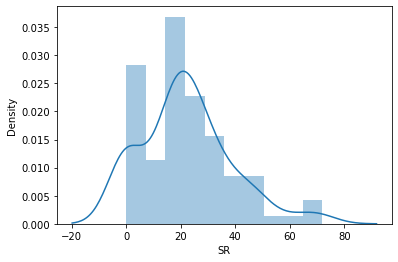

In [64]:
sns.distplot(f_d1['SR'])
plt.show()

Q8 : Generate Pair plot for the following variables : Avg, Stike Rate, Economy, Runs, Inns

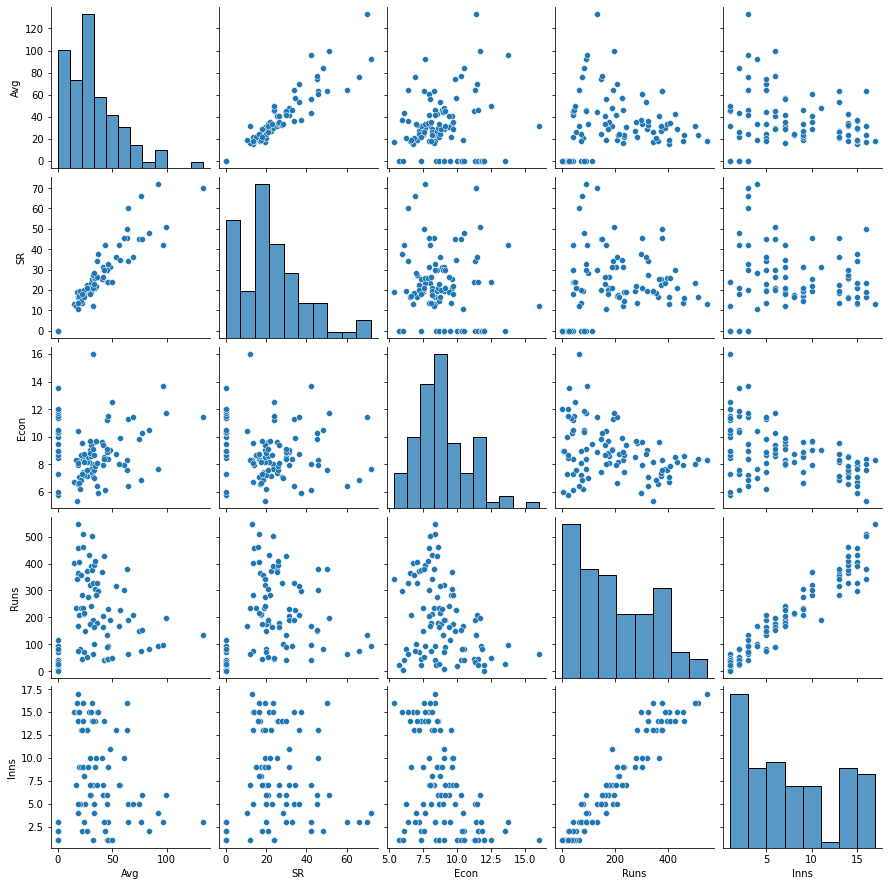

In [65]:
sns.pairplot(f_d1[['Avg','SR','Econ','Runs','Inns']])
plt.show()

In [66]:
# inference: From the above pair plot we can conclude that, (Runs and Inns),(SR and Avg) have strong positive correlation.

# Description of Teamplayer_dataset

Player : Name of the Player

Role : Role of the player in the IPL match

Price : Acution price for IPL 2020

In [67]:
d2 = pd.read_excel('team-players.xlsx')
d2.head()

,Player,Role,Price
0,Virat Kohli (R),Batsman,17 crore
1,AB de Villiers (R),Batsman,11 crore
2,Devdutt Padikkal (R),Batsman,20 lakhs
3,Gurkeerat Singh (R),Batsman,50 lakhs
4,Aaron Finch,Batsman,4.40 crore


In [68]:
# computing null values:

In [69]:
d2.isnull().sum()

Player    0
Role      0
Price     0
dtype: int64

In [70]:
# Value_counts:

In [71]:
d2['Player'].value_counts()

AB de Villiers (R)       1
Aaron Finch              1
Dale Steyn               1
Shivam Dube (R)          1
Isuru Udana              1
Yuzvendra Chahal (R)     1
Virat Kohli (R)          1
Pawan Negi (R)           1
Pavan Deshpande          1
Adam Zampa               1
Mohammed Siraj (R)       1
Parthiv Patel (R)        1
Joshua Philippe          1
Devdutt Padikkal (R)     1
Umesh Yadav (R)          1
Navdeep Saini (R)        1
Moeen Ali (R)            1
Washington Sundar (R)    1
Christopher Morris       1
Gurkeerat Singh (R)      1
Shahbaz Ahamad           1
Name: Player, dtype: int64

In [72]:
d2['a'] = d2['Player'].apply(lambda x:x.replace('(R)','') if '(R)' in x else x)
d2['a']

0           Virat Kohli 
1        AB de Villiers 
2      Devdutt Padikkal 
3       Gurkeerat Singh 
4            Aaron Finch
5         Shahbaz Ahamad
6        Joshua Philippe
7         Parthiv Patel 
8            Pawan Negi 
9           Shivam Dube 
10            Moeen Ali 
11           Isuru Udana
12       Pavan Deshpande
13    Christopher Morris
14            Adam Zampa
15            Dale Steyn
16       Mohammed Siraj 
17        Navdeep Saini 
18          Umesh Yadav 
19    Washington Sundar 
20     Yuzvendra Chahal 
Name: a, dtype: object

In [73]:
d2['Role'].value_counts()

Bowler           7
All-Rounder      6
Batsman          5
Wicket Keeper    3
Name: Role, dtype: int64

In [74]:
d2['Price'].value_counts()

20 lakhs      4
1.70 crore    2
50 lakhs      2
4.40 crore    1
17 crore      1
1.5 crore     1
4.20 crore    1
2.60 crore    1
6 crore       1
5 crore       1
1 crore       1
10 crore      1
2 crore       1
3 crore       1
11 crore      1
3.20 crore    1
Name: Price, dtype: int64

In [75]:
# Inference:

# no null value in the given dataset.

In [76]:
# to check duplicate:
d2[d2.duplicated()]

,Player,Role,Price,a


In [77]:
d2.dtypes

Player    object
Role      object
Price     object
a         object
dtype: object

In [78]:
# Converting object to float by replacing strings:

In [79]:
d2['Price'] = d2['Price'].apply(lambda x:float(x.replace('crore',''))*10000000 if 'crore' in x else float(x.replace('lakhs',''))*100000)
d2['Price']

0     170000000.0
1     110000000.0
2       2000000.0
3       5000000.0
4      44000000.0
5       2000000.0
6       2000000.0
7      17000000.0
8      10000000.0
9      50000000.0
10     17000000.0
11      5000000.0
12      2000000.0
13    100000000.0
14     15000000.0
15     20000000.0
16     26000000.0
17     30000000.0
18     42000000.0
19     32000000.0
20     60000000.0
Name: Price, dtype: float64

In [80]:
# # method 2:
# def conv(x):
#     if 'lakhs' in x:
#         x=x.replace('lakhs','')
#         x=float(x)*100000
#         return x
#     if 'crore' in x:
#         x=x.replace('crore','')
#         x=float(x)*10000000
#         return x
    
# df4['Price']=df4['Price'].apply(conv)
# df4['Price']

In [81]:
d2.head()

,Player,Role,Price,a
0,Virat Kohli (R),Batsman,170000000.0,Virat Kohli
1,AB de Villiers (R),Batsman,110000000.0,AB de Villiers
2,Devdutt Padikkal (R),Batsman,2000000.0,Devdutt Padikkal
3,Gurkeerat Singh (R),Batsman,5000000.0,Gurkeerat Singh
4,Aaron Finch,Batsman,44000000.0,Aaron Finch


In [82]:
d2.insert(loc = 1,column = 'PLAYER',value = d2['a'].to_list())

In [83]:
d2.head()

,Player,PLAYER,Role,Price,a
0,Virat Kohli (R),Virat Kohli,Batsman,170000000.0,Virat Kohli
1,AB de Villiers (R),AB de Villiers,Batsman,110000000.0,AB de Villiers
2,Devdutt Padikkal (R),Devdutt Padikkal,Batsman,2000000.0,Devdutt Padikkal
3,Gurkeerat Singh (R),Gurkeerat Singh,Batsman,5000000.0,Gurkeerat Singh
4,Aaron Finch,Aaron Finch,Batsman,44000000.0,Aaron Finch


In [84]:
d2.drop(['Player','a'],axis=1,inplace=True)

In [85]:
d2.head()

,PLAYER,Role,Price
0,Virat Kohli,Batsman,170000000.0
1,AB de Villiers,Batsman,110000000.0
2,Devdutt Padikkal,Batsman,2000000.0
3,Gurkeerat Singh,Batsman,5000000.0
4,Aaron Finch,Batsman,44000000.0


Q1 : Name the Player and Role in RCB who has choosen in acution for highest price.

In [86]:
# Player and role with highest auction price in IPL 2020
a = d2['Price'].max()
d2[d2['Price']==a][['PLAYER','Role']]

,PLAYER,Role
0,Virat Kohli,Batsman


Q2 : List the Player name who's role is Batsman in RCB in IPL 2020.

In [87]:
# List of Batsman in RCB
d2[d2['Role']=='Batsman']['PLAYER']

0         Virat Kohli 
1      AB de Villiers 
2    Devdutt Padikkal 
3     Gurkeerat Singh 
4          Aaron Finch
Name: PLAYER, dtype: object

Q3 : List the Player who's role is Bolwer in RCB in IPL 2020

In [88]:
# List of Bowlers in RCB
d2[d2['Role']=='Bowler']['PLAYER']

14            Adam Zampa
15            Dale Steyn
16       Mohammed Siraj 
17        Navdeep Saini 
18          Umesh Yadav 
19    Washington Sundar 
20     Yuzvendra Chahal 
Name: PLAYER, dtype: object

Q4 : List the different roles played by player in RCB in IPL 2020.

In [89]:
# Different roles of Players in RCB
d2['Role'].unique()

array(['Batsman', 'Wicket Keeper', 'All-Rounder', 'Bowler'], dtype=object)

Q5 : Give the statistical description about RCB in IPL 2020.

In [90]:
# statistical description about RCB
d2.describe()

,Price
count,2.100000e+01
mean,3.623810e+07
std,4.312297e+07
min,2.000000e+06
25%,5.000000e+06
50%,2.000000e+07
75%,4.400000e+07
max,1.700000e+08


# Description of Point_table Dataset

Team : Name of the team

M : Matches they have played

W : Matches they won

L : Matches they lost

N/R : Matches they haven't played

PT : Points in IPL 2020

NRR : Net Run Rate in IPL 2020

In [91]:
d3 = pd.read_excel('points-table.xlsx')
d3

,TEAM,M,W,L,N/R,PT,NRR
0,NaN,14.0,9.0,5.0,0.0,18.0,1.107
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MUMBAI INDIANS,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,14.0,8.0,6.0,0.0,16.0,-0.109
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DELHI CAPITALS,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,14.0,7.0,7.0,0.0,14.0,0.608
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,SUNRISERS HYDERABAD,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,14.0,7.0,7.0,0.0,14.0,-0.172


In [92]:
# Null value imputation:

In [93]:
d3.isnull().sum()/len(d3)

TEAM    0.666667
M       0.666667
W       0.666667
L       0.666667
N/R     0.666667
PT      0.666667
NRR     0.666667
dtype: float64

In [94]:
d31 = pd.DataFrame(d3['TEAM'])
d31 = d31.dropna()
d31 = d31.reset_index(drop = True)
d31

,TEAM
0,MUMBAI INDIANS
1,DELHI CAPITALS
2,SUNRISERS HYDERABAD
3,ROYAL CHALLENGERS BANGALORE
4,KOLKATA KNIGHT RIDERS
5,KINGS XI PUNJAB
6,CHENNAI SUPER KINGS
7,RAJASTHAN ROYALS


In [95]:
d32 = pd.DataFrame(d3.drop('TEAM',axis = 1))
d32 = d32.dropna()
d32 = d32.reset_index(drop = True)
d32

,M,W,L,N/R,PT,NRR
0,14.0,9.0,5.0,0.0,18.0,1.107
1,14.0,8.0,6.0,0.0,16.0,-0.109
2,14.0,7.0,7.0,0.0,14.0,0.608
3,14.0,7.0,7.0,0.0,14.0,-0.172
4,14.0,7.0,7.0,0.0,14.0,-0.214
5,14.0,6.0,8.0,0.0,12.0,-0.162
6,14.0,6.0,8.0,0.0,12.0,-0.455
7,14.0,6.0,8.0,0.0,12.0,-0.569


In [96]:
# merging:
d3 = pd.merge(d31,d32,left_index = True, right_index = True)
d3

,TEAM,M,W,L,N/R,PT,NRR
0,MUMBAI INDIANS,14.0,9.0,5.0,0.0,18.0,1.107
1,DELHI CAPITALS,14.0,8.0,6.0,0.0,16.0,-0.109
2,SUNRISERS HYDERABAD,14.0,7.0,7.0,0.0,14.0,0.608
3,ROYAL CHALLENGERS BANGALORE,14.0,7.0,7.0,0.0,14.0,-0.172
4,KOLKATA KNIGHT RIDERS,14.0,7.0,7.0,0.0,14.0,-0.214
5,KINGS XI PUNJAB,14.0,6.0,8.0,0.0,12.0,-0.162
6,CHENNAI SUPER KINGS,14.0,6.0,8.0,0.0,12.0,-0.455
7,RAJASTHAN ROYALS,14.0,6.0,8.0,0.0,12.0,-0.569


Q1 : List the team name with highest and lowest Net Run Rate in IPL 2020.

In [97]:
# Team with highest and lowest NRR 
high = d3.sort_values('NRR',ascending = False)['TEAM'].head(1)
low = d3.sort_values('NRR',ascending = True)['TEAM'].head(1)
print('Team with highest Net Run Rate in IPL 2020 is:',high.values)
print('Team with Lowest Net Run Rate in IPL 2020 is:',low.values)

Team with highest Net Run Rate in IPL 2020 is: ['MUMBAI INDIANS']
Team with Lowest Net Run Rate in IPL 2020 is: ['RAJASTHAN ROYALS']


Q2 : List the team name who has winning number greater than lossing number in IPL 2020.

In [98]:
# Team with winning number > Lossing number
t1 = d3[d3['W']>d3['L']]['TEAM']
print('Team who has winning number greater than lossing number in IPL 2020 is:',t1.values)

Team who has winning number greater than lossing number in IPL 2020 is: ['MUMBAI INDIANS' 'DELHI CAPITALS']


Q3 : List the team and Net Run Rate who's winning count, lossing count are same in IPL 2020. 

In [99]:
# Team and NRR who's Winning number = Lossing number
d3[d3['W']==d3['L']][['TEAM','NRR']]

,TEAM,NRR
2,SUNRISERS HYDERABAD,0.608
3,ROYAL CHALLENGERS BANGALORE,-0.172
4,KOLKATA KNIGHT RIDERS,-0.214


Q4 : Rank the Team based on minimum Net Run Rate to maximum in IPL 2020 and modify it as index.

In [100]:
# Rank the Team based on NRR from minimum to maximum
d3['RANK'] = d3['NRR'].rank(ascending = True)

In [101]:
d3.set_index('RANK',inplace = True)

In [102]:
d3.sort_values('RANK')

,TEAM,M,W,L,N/R,PT,NRR
RANK,,,,,,,
1.0,RAJASTHAN ROYALS,14.0,6.0,8.0,0.0,12.0,-0.569
2.0,CHENNAI SUPER KINGS,14.0,6.0,8.0,0.0,12.0,-0.455
3.0,KOLKATA KNIGHT RIDERS,14.0,7.0,7.0,0.0,14.0,-0.214
4.0,ROYAL CHALLENGERS BANGALORE,14.0,7.0,7.0,0.0,14.0,-0.172
5.0,KINGS XI PUNJAB,14.0,6.0,8.0,0.0,12.0,-0.162
6.0,DELHI CAPITALS,14.0,8.0,6.0,0.0,16.0,-0.109
7.0,SUNRISERS HYDERABAD,14.0,7.0,7.0,0.0,14.0,0.608
8.0,MUMBAI INDIANS,14.0,9.0,5.0,0.0,18.0,1.107


Q5 : What is the Average Net Run Rate of top 3 in IPL 2020?

In [103]:
# Average NRR based on top 3
d3.sort_values('NRR',ascending = False).head(3).mean()

M      14.000000
W       8.000000
L       6.000000
N/R     0.000000
PT     16.000000
NRR     0.535333
dtype: float64

Q6. List the team name who is below top 3 Average Net Run Rate in IPL 2020.

In [104]:
# Team name with below average of top 3 NRR
d3[d3['NRR']<0.535]['TEAM']

RANK
6.0                 DELHI CAPITALS
4.0    ROYAL CHALLENGERS BANGALORE
3.0          KOLKATA KNIGHT RIDERS
5.0                KINGS XI PUNJAB
2.0            CHENNAI SUPER KINGS
1.0               RAJASTHAN ROYALS
Name: TEAM, dtype: object